### Import libs and data from sklearn, load it at panda dataframe and print info

In [111]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
data = datasets.load_wine()
wine = pd.DataFrame(data=np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### Remove target fom dataframe and save it at "y" variable, copy dataframe data to "X" variable and split this in train and test.

In [112]:
y = wine[['target']]
wine.drop('target',axis=1,inplace=True)
X = wine[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Scale train data

In [113]:
train_scaler = StandardScaler()
X_train[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]] = train_scaler.fit_transform(X_train[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]])

### Scale test data

In [114]:
test_scaler = StandardScaler()
X_test[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]] = test_scaler.fit_transform(X_test[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]])

### Apply Logistic regression with cross validation

In [115]:
model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)
accuracy = scores.mean()
err = scores.std() * 2
print("Best accuracy:", accuracy, "with +/- error:", err)

Best accuracy: 0.984 with +/- error: 0.03919183588453088


### Test variations of parameters solver and multiclass

In [116]:
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
multiclasses = ["auto", "ovr", "multinomial"]

for solver in solvers:
    for multiclass in multiclasses:
        model = LogisticRegression(solver=solver, multi_class=multiclass)
        scores = cross_val_score(model, X_train, y_train, cv=5)
        accuracy = scores.mean()
        err = scores.std() * 2
        print("Best accuracy with params [solver="+ solver+ "] [multi_class="+ multiclass+ "] :", accuracy, "with +/- error: ", err)


Best accuracy with params [solver=newton-cg] [multi_class=auto] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=newton-cg] [multi_class=ovr] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=newton-cg] [multi_class=multinomial] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=lbfgs] [multi_class=auto] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=lbfgs] [multi_class=ovr] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=lbfgs] [multi_class=multinomial] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=liblinear] [multi_class=auto] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=liblinear] [multi_class=ovr] : 0.984 with +/- error:  0.03919183588453088
Best accuracy with params [solver=liblinear] [multi_class=multinomial] : nan with +/- error:  nan
Best accuracy with params [solv

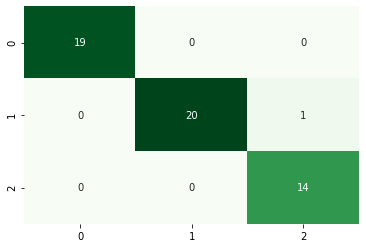

In [117]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

In [118]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.95      0.98        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Using LogisticRegression the results where better than using KNeighborsClassifier

- It had one positive result more in the confusion at class "1"
- LogisticRegression precision \[1, 1, 0.93\] compared to KNN Classifier precision \[0.95, 1, 0.93\]
- Accuracy for LogisticRegression 0.98, for KNeighborsClassifier 0.96